# pyber
####  The ride sharing bonanza continues! Seeing the success of notable players like Uber and Lyft, you've decided to join a fledgling ride sharing company of your own

* Project base on two data base: 
data/city_data.csv
 & data/ride_data.csv


## Read the City and Ride Data

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

#name the data base As : city_data_df & ride_data_df
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

city_data_df= pd.read_csv(city_data_to_load)
ride_data_df= pd.read_csv(ride_data_to_load)

#print (city_data_df.shape + ride_data_df.shape )

FileNotFoundError: File b'data/city_data.csv' does not exist

This is a really large dataset, it has 5656458 rows and 6 columns!

In [169]:
data.head()

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
0,Arab World,ARB,"Adolescent fertility rate (births per 1,000 wo...",SP.ADO.TFRT,1960,1.335609e+02
1,Arab World,ARB,Age dependency ratio (% of working-age populat...,SP.POP.DPND,1960,8.779760e+01
2,Arab World,ARB,"Age dependency ratio, old (% of working-age po...",SP.POP.DPND.OL,1960,6.634579e+00
3,Arab World,ARB,"Age dependency ratio, young (% of working-age ...",SP.POP.DPND.YG,1960,8.102333e+01
4,Arab World,ARB,Arms exports (SIPRI trend indicator values),MS.MIL.XPRT.KD,1960,3.000000e+06


As you see at the top of table, there are 10 first rows of database. The result shows different indicators for different countries with value and year. 

# lets go 

In [172]:
row_1=data.iloc[0]
print(row_1)

CountryName                                             Arab World
CountryCode                                                    ARB
IndicatorName    Adolescent fertility rate (births per 1,000 wo...
IndicatorCode                                          SP.ADO.TFRT
Year                                                          1960
Value                                                      133.561
Name: 0, dtype: object


In [173]:
data.index

RangeIndex(start=0, stop=5656458, step=1)

In [174]:
data.columns

Index(['CountryName', 'CountryCode', 'IndicatorName', 'IndicatorCode', 'Year',
       'Value'],
      dtype='object')

## Is Null value in data?

In [175]:
data.isnull().any()

CountryName      False
CountryCode      False
IndicatorName    False
IndicatorCode    False
Year             False
Value            False
dtype: bool

* We are ready to go there is no null value.

### How many UNIQUE country names are there ?

In [176]:
#countries= data['countryname'].unique().tolist()
countries = data['CountryName'].unique().tolist()
len(countries)

247

### Are there same number of country codes ?

In [177]:
# How many unique country codes are there ? (should be the same #)
countryCodes = data['CountryCode'].unique().tolist()
len(countryCodes)

247

### Are there many indicators or few ?

In [178]:
# How many unique indicators are there ? (should be the same #)
indicators = data['IndicatorName'].unique().tolist()
len(indicators)

1344

### How many years of data do we have ?

In [179]:
# How many years of data do we have ?
years = data['Year'].unique().tolist()
len(years)

56

### What's the range of years?

In [180]:
print(min(years)," to ",max(years))

1960  to  2015


* I am going to choose USA as sample of development country and Middel Esat & North Africa to analysis the life expectany betweem women and men. 


## First: Explore the life expenctancy at birth for female and male in USA 

* Lets pick a countrycode and an indicator to explore: Life expectancy at birth, female and the USA

In [181]:
# select Life expectancy at birth, female (years) for the United States
life_findicator = 'Life expectancy at birth, female'
#life_mindicator='Life expectancy at birth, male'
life_country = 'USA'

mask1 = data['IndicatorName'].str.contains(life_findicator) 
mask2 = data['CountryCode'].str.contains(life_country)
#mask3 = data['IndicatorName'].str.contains(life_mindicator)

# stage is just those indicators matching the USA for country code and life expectancy at birth for female over years.
stage = data[mask1 & mask2]
    

In [182]:
stage.head()


,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
22321,United States,USA,"Life expectancy at birth, female (years)",SP.DYN.LE00.FE.IN,1960,73.1
48801,United States,USA,"Life expectancy at birth, female (years)",SP.DYN.LE00.FE.IN,1961,73.6
77186,United States,USA,"Life expectancy at birth, female (years)",SP.DYN.LE00.FE.IN,1962,73.5
105804,United States,USA,"Life expectancy at birth, female (years)",SP.DYN.LE00.FE.IN,1963,73.4
134842,United States,USA,"Life expectancy at birth, female (years)",SP.DYN.LE00.FE.IN,1964,73.7


In [183]:
#size of stage
stage.shape

(54, 6)

In [184]:
#range of years in stage data set 
stageyear=stage['Year'].unique().tolist()
print(min(stageyear),'to',max(stageyear))

1960 to 2013


In [185]:
stage.describe()

,Year,Value
count,54.000000,54.000000
mean,1986.500000,77.695556
std,15.732133,2.424005
min,1960.000000,73.100000
25%,1973.250000,75.450000
50%,1986.500000,78.250000
75%,1999.750000,79.400000
max,2013.000000,81.300000


####  Female in USA:  Minmum age= 73,  Maximum= 81,  Mean= 77 and the range of year is: 1960 to 2013

## second: Explor the life expectancy at birth for male in USA.

In [186]:
# select Life expectancy at birth, female (years) for the United States
#life_findicator = 'Life expectancy at birth, female'
life_mindicator='Life expectancy at birth, male'
life_country = 'USA'

#mask1 = data['IndicatorName'].str.contains(life_findicator) 
mask2 = data['CountryCode'].str.contains(life_country)
mask3 = data['IndicatorName'].str.contains(life_mindicator)

# stage is just those indicators matching the USA for country code and life expectancy at birth for female over years.
male_stage = data[mask2 & mask3]
    

In [187]:
male_stage.head()

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
22322,United States,USA,"Life expectancy at birth, male (years)",SP.DYN.LE00.MA.IN,1960,66.6
48802,United States,USA,"Life expectancy at birth, male (years)",SP.DYN.LE00.MA.IN,1961,67.1
77187,United States,USA,"Life expectancy at birth, male (years)",SP.DYN.LE00.MA.IN,1962,66.9
105805,United States,USA,"Life expectancy at birth, male (years)",SP.DYN.LE00.MA.IN,1963,66.6
134843,United States,USA,"Life expectancy at birth, male (years)",SP.DYN.LE00.MA.IN,1964,66.8


In [188]:
male_stage.shape

(54, 6)

In [189]:
male_stageyear=male_stage['Year'].unique().tolist()
print(min(male_stageyear),'to', max(male_stageyear))

1960 to 2013


In [194]:
male_stage.describe()

,Year,Value
count,54.000000,54.000000
mean,1986.500000,71.176667
std,15.732133,3.252545
min,1960.000000,66.000000
25%,1973.250000,67.750000
50%,1986.500000,71.300000
75%,1999.750000,74.050000
max,2013.000000,76.500000


####  Male in USA:  Minmum age = 66, Maximum age= 76, Mean= 71 and the range of year is: 1960 to 2013

According to the above, stage and male_stage have same dimonsions, and same column in Year.
** so im going to merg this 2 data set toghter** 

In [195]:

both_stage=pd.merge(stage,male_stage, on= 'Year')


In [196]:
both_stage.head()

,CountryName_x,CountryCode_x,IndicatorName_x,IndicatorCode_x,Year,Value_x,CountryName_y,CountryCode_y,IndicatorName_y,IndicatorCode_y,Value_y
0,United States,USA,"Life expectancy at birth, female (years)",SP.DYN.LE00.FE.IN,1960,73.1,United States,USA,"Life expectancy at birth, male (years)",SP.DYN.LE00.MA.IN,66.6
1,United States,USA,"Life expectancy at birth, female (years)",SP.DYN.LE00.FE.IN,1961,73.6,United States,USA,"Life expectancy at birth, male (years)",SP.DYN.LE00.MA.IN,67.1
2,United States,USA,"Life expectancy at birth, female (years)",SP.DYN.LE00.FE.IN,1962,73.5,United States,USA,"Life expectancy at birth, male (years)",SP.DYN.LE00.MA.IN,66.9
3,United States,USA,"Life expectancy at birth, female (years)",SP.DYN.LE00.FE.IN,1963,73.4,United States,USA,"Life expectancy at birth, male (years)",SP.DYN.LE00.MA.IN,66.6
4,United States,USA,"Life expectancy at birth, female (years)",SP.DYN.LE00.FE.IN,1964,73.7,United States,USA,"Life expectancy at birth, male (years)",SP.DYN.LE00.MA.IN,66.8


In [197]:
both_stage.shape

(54, 11)

In [198]:
both_stage.columns

Index(['CountryName_x', 'CountryCode_x', 'IndicatorName_x', 'IndicatorCode_x',
       'Year', 'Value_x', 'CountryName_y', 'CountryCode_y', 'IndicatorName_y',
       'IndicatorCode_y', 'Value_y'],
      dtype='object')

 ** both_stage is a merged database of life expectancy at birth for female and male.**

### Let's see how life expectancy at birth  for female and male have changed over time in USA ; Using MatplotLib

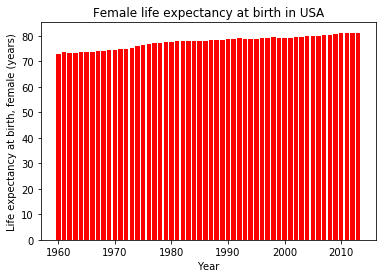

In [199]:
#Explore for female
# get the years
years = both_stage['Year'].values
# get the values 
f_life_exp = both_stage['Value_x'].values

# create
import matplotlib.pyplot as plt
plt.xlabel('Year')
plt.ylabel(both_stage['IndicatorName_x'].iloc[0])
plt.title('Female life expectancy at birth in USA')


plt.bar(years,f_life_exp, facecolor='red')
plt.show()

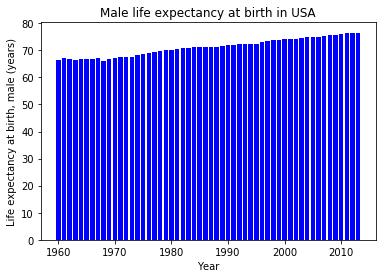

In [200]:
 #Explore for male
# get the years
years = both_stage['Year'].values
# get the values 
m_life_exp = both_stage['Value_y'].values



# create
import matplotlib.pyplot as plt
plt.xlabel('Year')
plt.ylabel(both_stage['IndicatorName_y'].iloc[0])
plt.title('Male life expectancy at birth in USA')


plt.bar(years,m_life_exp, facecolor ='blue')
plt.show()

* Both bar_plot for femal and male show: the life expectancy at birth have increased over time in USA.  

### let's make this graphic a bit more appealing with using * line-plot* before we continue to explore it.

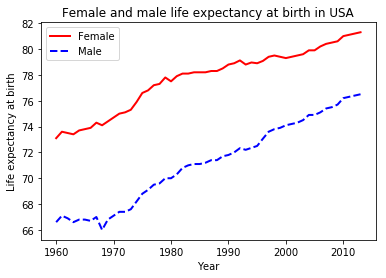

In [201]:

plt.plot( both_stage['Year'].values, both_stage['Value_x'].values, marker='', color='red',linewidth=2, linestyle='-', label="Female")
plt.plot( both_stage['Year'].values, both_stage['Value_y'].values, marker='', color='blue', linewidth=2, linestyle='dashed', label="Male")


plt.xlabel('Year')
plt.ylabel('Life expectancy at birth')
plt.title('Female and male life expectancy at birth in USA')
plt.legend()

 * According to results in Line plot, life expentency for women and men have gotten longer during the years but The life expectancy for women is more dramatically longer than men. 

In [205]:
# we can find coor between them in numpy . it give us the relation ship between life expectancy for women and men.  
import numpy as np
np.corrcoef(stage['Value'],male_stage['Value'])

array([[1.        , 0.97243832],
       [0.97243832, 1.        ]])

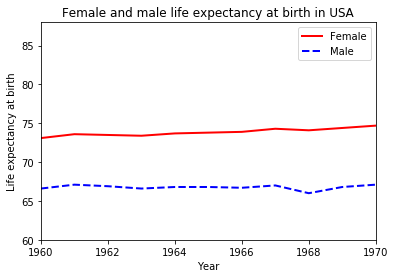

In [204]:

plt.plot( both_stage['Year'].values, both_stage['Value_x'].values, marker='', color='red',linewidth=2, linestyle='-', label="Female")
plt.plot( both_stage['Year'].values, both_stage['Value_y'].values, marker='', color='blue', linewidth=2, linestyle='dashed', label="Male")


plt.xlabel('Year')
plt.ylabel('Life expectancy at birth')
plt.title('Female and male life expectancy at birth in USA')
plt.axis([1960, 1970,60,88])
plt.legend()


# Using histogram to explore distribution of valus
We could also visualize this data as a histogram to better explore the ranges of years of life expectancy in USA per year.

Text(0.5,1,'Female life expectancy at birth in USA')

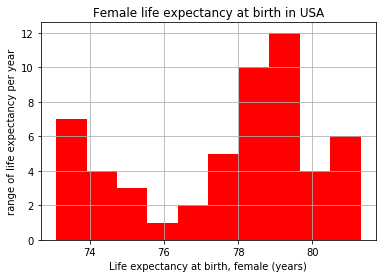

In [210]:
#female
both_stage.hist(column='Value_x',normed=False , facecolor='Red')
plt.xlabel(both_stage['IndicatorName_x'].iloc[0])
plt.ylabel('range of life expectancy per year')
plt.title('Female life expectancy at birth in USA')

Text(0.5,1,'male life expectancy at birth in USA')

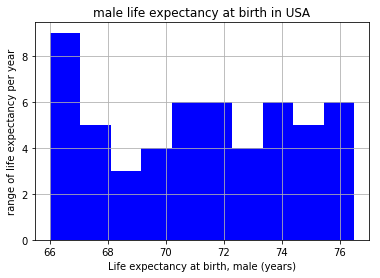

In [212]:
#male
both_stage.hist(column='Value_y',normed=False , facecolor='blue')
plt.xlabel(both_stage['IndicatorName_y'].iloc[0])
plt.ylabel('range of life expectancy per year')
plt.title('male life expectancy at birth in USA')


### The female average life expectancy and the average male life expectancy in USA is between 5 and 6 years.

## lets explore life expentency for female and male in Middle East & North Africa:

In [213]:
# select Life expectancy at birth, female (years) for the Middle East & North Africa
life_findicator = 'Life expectancy at birth, female'
#life_mindicator='Life expectancy at birth, male'
life_country = 'MNA'

mask1 = data['IndicatorName'].str.contains(life_findicator) 
mask2 = data['CountryCode'].str.contains(life_country)
#mask3 = data['IndicatorName'].str.contains(life_mindicator


# stage is just those indicators matching the USA for country code and life expectancy at birth for female over years.
MNA_Fstage = data[mask1 & mask2]
    

In [214]:
MNA_Fstage.head()

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
2202,Middle East & North Africa (developing only),MNA,"Life expectancy at birth, female (years)",SP.DYN.LE00.FE.IN,1960,47.214522
25734,Middle East & North Africa (developing only),MNA,"Life expectancy at birth, female (years)",SP.DYN.LE00.FE.IN,1961,47.824114
52498,Middle East & North Africa (developing only),MNA,"Life expectancy at birth, female (years)",SP.DYN.LE00.FE.IN,1962,48.436222
80923,Middle East & North Africa (developing only),MNA,"Life expectancy at birth, female (years)",SP.DYN.LE00.FE.IN,1963,49.056239
109569,Middle East & North Africa (developing only),MNA,"Life expectancy at birth, female (years)",SP.DYN.LE00.FE.IN,1964,49.685257


In [215]:
MNA_stage.shape

(54, 6)

In [226]:
MNA_Fstage.describe()

,Year,Value
count,54.000000,54.000000
mean,1986.500000,63.227352
std,15.732133,8.720571
min,1960.000000,47.214522
25%,1973.250000,55.272400
50%,1986.500000,65.546449
75%,1999.750000,71.022014
max,2013.000000,74.388558


####  Female in Midddle East: Minimum age =47, Maximum age=74, Mean=63 and the range of year is: 1986 to 2013

In [216]:
# select Life expectancy at birth, male (years) for the middle East and North Africa
#life_findicator = 'Life expectancy at birth, male'
life_mindicator='Life expectancy at birth, male'
life_country = 'MNA'

#mask1 = data['IndicatorName'].str.contains(life_findicator) 
mask2 = data['CountryCode'].str.contains(life_country)
mask3 = data['IndicatorName'].str.contains(life_mindicator)

# stage is just those indicators matching the USA for country code and life expectancy at birth for female over years.
MNA_Mstage = data[mask1 & mask2]
    

In [217]:
MNA_Mstage.head()

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
2202,Middle East & North Africa (developing only),MNA,"Life expectancy at birth, female (years)",SP.DYN.LE00.FE.IN,1960,47.214522
25734,Middle East & North Africa (developing only),MNA,"Life expectancy at birth, female (years)",SP.DYN.LE00.FE.IN,1961,47.824114
52498,Middle East & North Africa (developing only),MNA,"Life expectancy at birth, female (years)",SP.DYN.LE00.FE.IN,1962,48.436222
80923,Middle East & North Africa (developing only),MNA,"Life expectancy at birth, female (years)",SP.DYN.LE00.FE.IN,1963,49.056239
109569,Middle East & North Africa (developing only),MNA,"Life expectancy at birth, female (years)",SP.DYN.LE00.FE.IN,1964,49.685257


In [225]:
MNA_Mstage.describe()

,Year,Value
count,54.000000,54.000000
mean,1986.500000,63.227352
std,15.732133,8.720571
min,1960.000000,47.214522
25%,1973.250000,55.272400
50%,1986.500000,65.546449
75%,1999.750000,71.022014
max,2013.000000,74.388558


####  Male in Midddle East: Minmum age =47, Maximum age=74, Mean=63 and the range of year is: 1986 to 2013
* The average female life expectancy and the average male life expentancy in the Middle East are almost the same. 

* According to the results, the average Life expectancy in Middle East & North Africa is less than developed country like USA.The difference in life expectancy at birth between women in USA and women in Middle East is hug.

#### Explore life expectancy at birth, for the Middle East and North Africa with Matplot and find corr between them


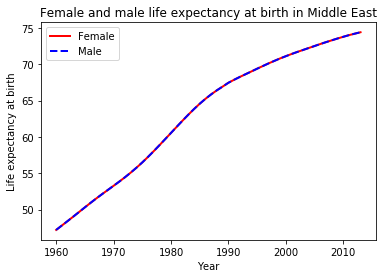

In [227]:

plt.plot( MNA_Fstage['Year'].values, MNA_Fstage['Value'].values, marker='', color='red',linewidth=2, linestyle='-', label="Female")
plt.plot( MNA_Mstage['Year'].values, MNA_Mstage['Value'].values, marker='', color='blue', linewidth=2, linestyle='dashed', label="Male")


plt.xlabel('Year')
plt.ylabel('Life expectancy at birth')
plt.title('Female and male life expectancy at birth in Middle East')
plt.legend()

In [228]:
np.corrcoef(MNA_Mstage['Value'],MNA_Fstage['Value'])

array([[1., 1.],
       [1., 1.]])

* Correlation of 1 is pretty strong for the life expentancy at birth between male and female in Middle East & North Africa.

Text(0.5,1,'male life expectancy at birth in Middle East')

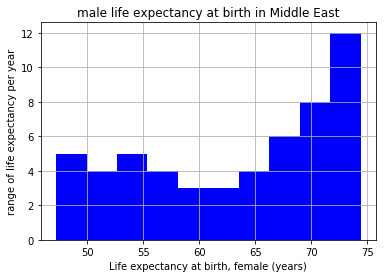

In [229]:
#male histogram
MNA_Mstage.hist(column='Value',normed=False , facecolor='blue')
plt.xlabel(MNA_Mstage['IndicatorName'].iloc[0])
plt.ylabel('range of life expectancy per year')
plt.title('male life expectancy at birth in Middle East')


Text(0.5,1,'female life expectancy at birth in Middle East')

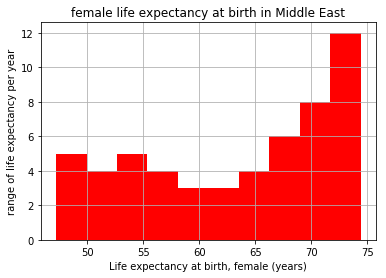

In [230]:
#female histogram
MNA_Fstage.hist(column='Value',normed=False , facecolor='red')
plt.xlabel(MNA_Fstage['IndicatorName'].iloc[0])
plt.ylabel('range of life expectancy per year')
plt.title('female life expectancy at birth in Middle East')


* According to the result of exploring life expectancy at birth in Middle East & North Africa : life expectancy for male and female is very close together


## Compair life expectancy at birth in  Middle East & USA 

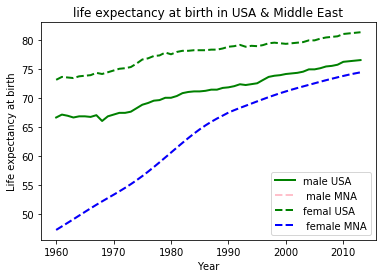

In [232]:
# compair male life expantancy in USA and Midddle East:

plt.plot( both_stage['Year'].values, both_stage['Value_y'].values, marker='', color='green',linewidth=2, linestyle='-', label="male USA")
plt.plot( MNA_Mstage['Year'].values, MNA_Mstage['Value'].values, marker='', color='pink', linewidth=2, linestyle='dashed', label=" male MNA")
plt.plot(both_stage['Year'].values, both_stage['Value_x'].values, marker='', color='green',linewidth=2, linestyle='dashed', label="femal USA")
plt.plot( MNA_Fstage['Year'].values, MNA_Fstage['Value'].values, marker='', color='blue', linewidth=2, linestyle='dashed', label=" female MNA")


plt.xlabel('Year')
plt.ylabel('Life expectancy at birth')
plt.title('life expectancy at birth in USA & Middle East')
plt.legend()


* This plot shows women in USA live longer than others. 

# results:
* The life expectancy at birth have increased over time in World.  
* Number of years women are expected to live longer than men in developed country such USA.
* Number of years people in USA are expected to live is longer than people in Middle East & North Africa.